Độ chính xác: 0.35


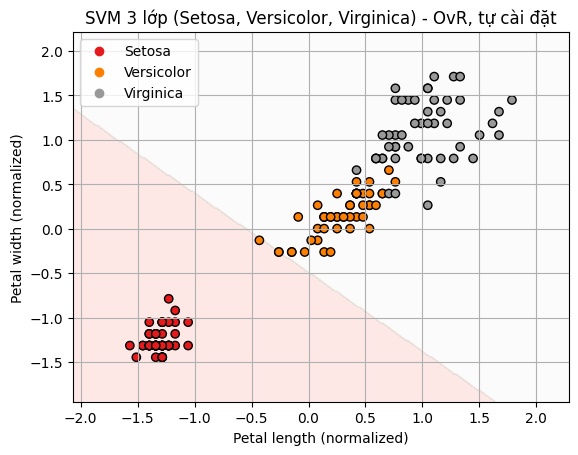

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu
df = pd.read_csv("iris.csv")

# 2. Gán nhãn: setosa=0, versicolor=1, virginica=2
label_map = {"setosa": 0, "versicolor": 1, "virginica": 2}
df["label"] = df["species"].map(label_map)

# 3. Chọn đặc trưng
X = df[["petal_length", "petal_width"]].values
y = df["label"].values

# 4. Chuẩn hoá
X = (X - X.mean(axis=0)) / X.std(axis=0)

# 5. Tạo mô hình SVM đa lớp OvR
num_classes = 3
num_features = X.shape[1]
W = np.zeros((num_classes, num_features))  # ma trận trọng số (3 lớp x 2 đặc trưng)
b = np.zeros(num_classes)

# 6. Siêu tham số
lr = 0.01
epochs = 1000
C = 1.0

# 7. Huấn luyện từng lớp theo chiến lược One-vs-Rest
for cls in range(num_classes):
    # Tạo nhãn nhị phân: lớp hiện tại = +1, lớp còn lại = -1
    y_binary = np.where(y == cls, 1, -1)
    w = np.zeros(num_features)
    bias = 0

    for epoch in range(epochs):
        for i in range(len(X)):
            condition = y_binary[i] * (np.dot(X[i], w) + bias)
            if condition >= 1:
                w -= lr * (2 * w)
            else:
                w -= lr * (2 * w - C * y_binary[i] * X[i])
                bias -= lr * (-C * y_binary[i])

    W[cls] = w
    b[cls] = bias

# 8. Dự đoán
def predict(X):
    scores = np.dot(W, X.T) + b[:, np.newaxis]  # (3, N)
    return np.argmax(scores, axis=0)  # chọn lớp có score lớn nhất

y_pred = predict(X)

# 9. Độ chính xác
accuracy = np.mean(y_pred == y)
print(f"Độ chính xác: {accuracy:.2f}")

# 10. Vẽ đường phân lớp
# Tạo lưới để vẽ vùng
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = predict(grid)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="Pastel1")
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Set1", edgecolors="k")

plt.xlabel("Petal length (normalized)")
plt.ylabel("Petal width (normalized)")
plt.title("SVM 3 lớp (Setosa, Versicolor, Virginica) - OvR, tự cài đặt")
plt.legend(handles=scatter.legend_elements()[0], labels=["Setosa", "Versicolor", "Virginica"])
plt.grid(True)
plt.show()
